# Note:

We faced some issues in detection when we used Batch normalization during the test time. The zebras in the left of the image were detected but were classified as 

In [1]:
import sys
sys.path.append('/Users/sam/All-Program/App/ObjectDetection/')

import logging
logging.basicConfig(level=logging.DEBUG, filename="logfile.log", filemode="w",
                    format="%(asctime)-15s %(levelname)-8s %(message)s")

import numpy as np
from scipy import ndimage
from scipy import misc
from MaskRCNN.visualize import Visualize

from MaskRCNN.main import Inference

%matplotlib inline 

pretrained_weights_path = '/Users/sam/All-Program/App-DataSet/ObjectDetection/MaskRCNN/mask_rcnn_coco.h5'
save_dir = '/Users/sam/All-Program/App-DataSet/ObjectDetection/MaskRCNN/'

Using TensorFlow backend.


In [2]:
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

## Run fcn_rpn_proposal generation

In [3]:
obj_inference = Inference(pretrained_weights_path, run='fpn_rcn_proposals', save=True, save_dir=save_dir, DEBUG=False)
feature_maps, proposals, image_metas = obj_inference.get_feature_maps_and_proposals()
print (len(feature_maps), proposals.shape, image_metas)

(process_images) Image Resized Nnormalized: (shape)  (1, 1024, 1024, 3)
(process_images) Image meta: (shape)  (1, 13)
(process_images) Image Window: (shape)  (1, 4)
(process_images) Anchors: (shape)  (1, 261888, 4)
(INPUT IMAGE) Shape of input image batch:  (1024, 1024, 3)
(IMAGE META) Image Metas:  [['3627527276_6fe8cd9bfe_z' '476' '640' '3' '1024' '1024' '3' '131' '0'
  '893' '1024' '1.6' '0']]
(ANCHORS):  (1, 261888, 4)
(FPN) C2: (shape)  (?, 256, 256, 256)
(FPN) C3: (shape)  (?, 128, 128, 512)
(FPN) C4: (shape)  (?, 64, 64, 1024)
(FPN) C5: (shape)  (?, 32, 32, 2048)
(FPN) P2: (shape)  (?, 256, 256, 256)
(FPN) P3: (shape)  (?, 128, 128, 256)
(FPN) P4: (shape)  (?, 64, 64, 256)
(FPN) P5: (shape)  (?, 32, 32, 256)
(RPN) Class Logits (shape)  (?, ?, 2)
(RPN) Class Probs (shape)  (?, ?, 2)
(RPN) Bbox (shape)  (?, ?, 4)
(Proposals) Proposals (shape)  (1, ?, ?)
RUNNING FPN ..............
(FPN) P2=(1, 256, 256, 256), P3=(1, 128, 128, 256), P4=(1, 64, 64, 256), P5=(1, 32, 32, 256), P6=(1, 1

## Run mrcnn_detections generation

In [4]:
obj_inference = Inference(pretrained_weights_path, run='mrcnn_detection', save=True, save_dir=save_dir, DEBUG=False)
mrcnn_class_probs, mrcnn_bbox, detections, detection_unmold = obj_inference.get_mrcnn_prob_bbox_and_detections()

Max and Min Proposals,  1.0 0.0
Num NaN present in Proposals  0
(MRCNN) feature_map (len)  4
(MRCNN) proposals (shape)  (1, 1000, 4)
1 [[476 640   3]] [[1024 1024    3]] [[ 131    0  893 1024]]
(MRCNN) Pooled Roi's (shape) (1, ?, 7, 7, 256)
window  [[ 0.12805474  0.          0.87194526  1.        ]]
(MASK RCNN) mrcnn_class_probs (shape) (1, 1000, 81)
(MASK RCNN) mrcnn_bbox (shape) (1, 1000, 81, 4)
(DETECTION) detections (shape) (1, 100, 6)
image_shape  [1024 1024    3]
original_image_shape  [476 640   3]
image_window  [ 131    0  893 1024]
RUNNING utils (denorm_boxes)......................
[[215 411 295 622]
 [232  47 395 163]
 [238 255 271 342]
 [234  99 342 215]]


## Vizualize Detections

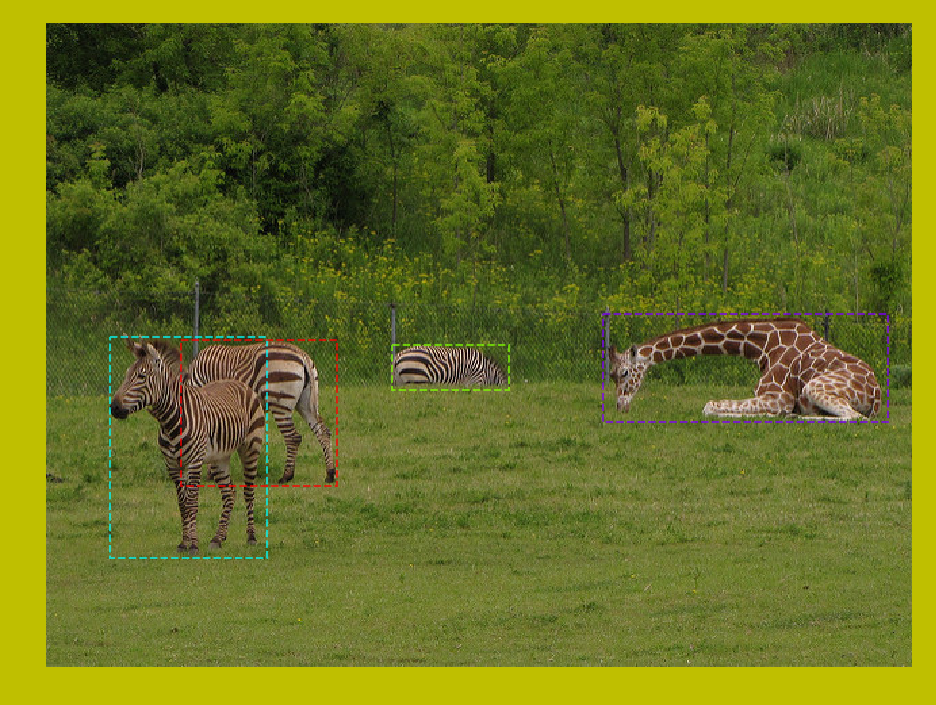

In [5]:
img_path = '/Users/sam/All-Program/App-DataSet/ObjectDetection/images/3627527276_6fe8cd9bfe_z.jpg'
Visualize(img_path).visualize_boxes(boxes=detection_unmold[0], class_names=class_names)